In [ ]:
!pip install qiskit-aer

In [ ]:
!pip install qiskit

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from qiskit import QuantumCircuit, transpile
from qiskit.visualization import plot_histogram
from qiskit.circuit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit_aer import AerSimulator

In [12]:
def get_counts_from_qc(circuit):
  shots = 30000
  backend = AerSimulator()
  transpiled_circuit = transpile(circuit, backend)
  result = backend.run(transpiled_circuit, shots=shots).result()
  counts = result.get_counts()
  normalized_counts = {key: (value / shots) for key, value in counts.items()}
  return normalized_counts

In [13]:
n = 4

qubits = QuantumRegister(n)
clbits = ClassicalRegister(n)
qc = QuantumCircuit(qubits, clbits)
(q0, q1, q2, q3) = qubits
(c0, c1, c2, c3) = clbits

# ENTANGLEMENT GENERATION
# generate entanglement between q0, q1 and q2, q3
qc.h([q0, q2])
qc.cx(q0,q1)
qc.cx(q2,q3)
qc.barrier()


# ENTANGLEMENT SWAPPING
# convert q1 and q2 from Bell basis to computational basis
qc.cx(q1,q2)
qc.h(q1)
qc.barrier()

# measure to see what Bell state we have in qubits 1 and 2,
# telling us what Bell state we have in qubits 0 and 4
qc.measure(q1,c1)
qc.measure(q2,c2)
qc.barrier()

"""
# testing out to see if putting qubits 1 and 2 back to bell basis has any effect (it doesnt)
qc.h(q1)
qc.cx(q1,q2)
qc.barrier()
"""

# bell state in q0, q4 corrections based on bell measurement
with qc.if_test((c1,0) and (c2,0)):
  qc.id(q3)

with qc.if_test((c1,1) and (c2,0)):
  qc.z(q3)

with qc.if_test((c1,0) and (c2,1)):
  qc.x(q3)

with qc.if_test((c1,1) and (c2,1)):
  qc.x(q3)
  qc.z(q3)

qc.barrier()
qc.measure(q0,c0)
qc.measure(q3,c3)

qc.draw()

┌───┐      ░            ░        ░                            »
q3_0: ┤ H ├──■───░────────────░────────░────────────────────────────»
      └───┘┌─┴─┐ ░      ┌───┐ ░ ┌─┐    ░                            »
q3_1: ─────┤ X ├─░───■──┤ H ├─░─┤M├────░────────────────────────────»
      ┌───┐└───┘ ░ ┌─┴─┐└───┘ ░ └╥┘┌─┐ ░                            »
q3_2: ┤ H ├──■───░─┤ X ├──────░──╫─┤M├─░────────────────────────────»
      └───┘┌─┴─┐ ░ └───┘      ░  ║ └╥┘ ░   ┌──────   ┌───┐ ───────┐ »
q3_3: ─────┤ X ├─░────────────░──╫──╫──░───┤ If-0  ──┤ I ├  End-0 ├─»
           └───┘ ░            ░  ║  ║  ░   └──╥───   └───┘ ───────┘ »
                                 ║  ║    ┌────╨─────┐               »
c2: 4/═══════════════════════════╩══╩════╡ c2_2=0x0 ╞═══════════════»
                                 1  2    └──────────┘               »
«                                                                             »
«q3_0: ───────────────────────────────────────────────────────────────────────»
«                                                                             »
«q3_1: ───────────────────────────────────────────────────────────────────────»
«                                                                             »
«q3_2: ───────────────────────────────────────────────────────────────────────»
«        ┌──────   ┌───┐ ───────┐   ┌──────   ┌───┐ ───────┐   ┌──────   ┌───┐»
«q3_3: ──┤ If-0  ──┤ Z ├  End-0 ├───┤ If-0  ──┤ X ├  End-0 ├───┤ If-0  ──┤ X ├»
«        └──╥───   └───┘ ───────┘   └──╥───   └───┘ ───────┘   └──╥───   └───┘»
«      ┌────╨─────┐               ┌────╨─────┐               ┌────╨─────┐     »
«c2: 4/╡ c2_2=0x0 ╞═══════════════╡ c2_2=0x1 ╞═══════════════╡ c2_2=0x1 ╞═════»
«      └──────────┘               └──────────┘               └──────────┘     »
«                      ░ ┌─┐   
«q3_0: ────────────────░─┤M├───
«                      ░ └╥┘   
«q3_1: ────────────────░──╫────
«                      ░  ║    
«q3_2: ────────────────░──╫────
«      ┌───┐ ───────┐  ░  ║ ┌─┐
«q3_3: ┤ Z ├  End-0 ├──░──╫─┤M├
«      └───┘ ───────┘  ░  ║ └╥┘
«c2: 4/═══════════════════╩══╩═
«                         0  3

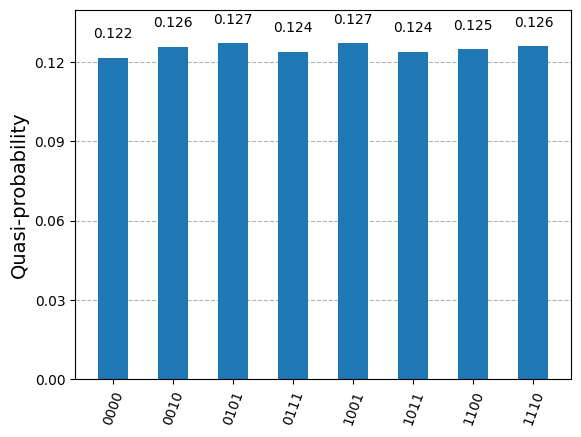

In [14]:
plot_histogram(get_counts_from_qc(qc))